In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [4]:
# Get the crowdfunding_info_df columns.
crowdfunding_columns = crowdfunding_info_df.columns.tolist()
crowdfunding_columns

['cf_id',
 'contact_id',
 'company_name',
 'blurb',
 'goal',
 'pledged',
 'outcome',
 'backers_count',
 'country',
 'currency',
 'launched_at',
 'deadline',
 'staff_pick',
 'spotlight',
 'category & sub-category']

In [5]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category', 'subcategory']] = \
crowdfunding_info_df['category & sub-category'].str.split('/', n=2, expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [6]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique().tolist()
subcategories = crowdfunding_info_df['subcategory'].unique().tolist()

print(f'categories list: {categories} \n')
print('-'*100 + '\n')
print(f'categories list: {subcategories}')

categories list: ['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism'] 

----------------------------------------------------------------------------------------------------

categories list: ['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
# categories = np.arange(1,10)
# subcategories = np.arange(1,25)

print(len(categories))
print(len(subcategories))

9
24


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = []

for x in category_ids:
    cat_ids.append(f'cat{x}')
    
# Use a list comprehension to add "subcat" to each subcategory_id.    
subcat_ids = []

for y in subcategory_ids:
    subcat_ids.append(f'subcat{y}')
    
print(f'category_ids: {cat_ids}\n')
print('-'*100 + '\n')
print(f'subcategory_ids: {subcat_ids}')

category_ids: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']

----------------------------------------------------------------------------------------------------

subcategory_ids: ['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [10]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({'category_id': cat_ids, 'category': categories})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({'subcategory_id': subcat_ids,\
                              'subcategory': subcategories})

In [11]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [12]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [13]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [14]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [15]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launch_date', 'deadline': 'end_date'}, inplace=True)
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


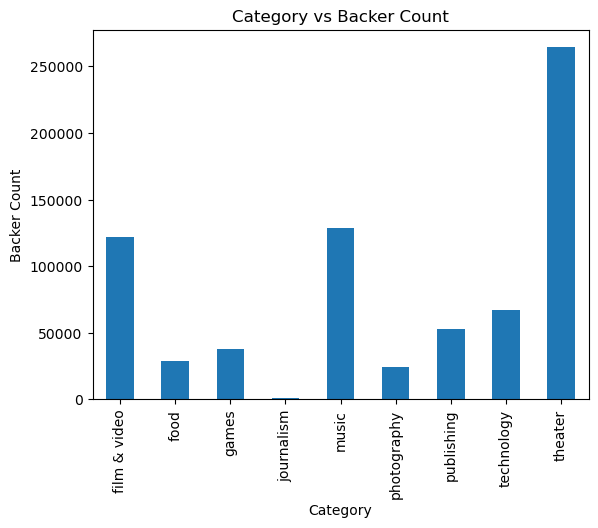

In [16]:
# Create a bar graph that displays the money backer_count for each category
category_counts = campaign_df[["category", "backers_count"]] 
category_counts = campaign_df.groupby("category") ["backers_count"].sum()
category_counts.plot.bar(x='category', y='backer_count')  # Specify x and y columns
plt.xlabel("Category")
plt.ylabel("Backer Count")
plt.title("Category vs Backer Count")
plt.show()


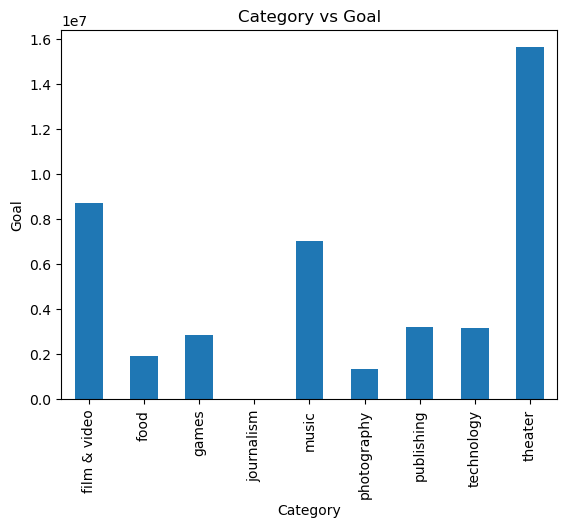

In [17]:
# Create a bar graph that displays the goal for each category 
category_goal = campaign_df[["category", "goal"]] 
category_goal = campaign_df.groupby("category") ["goal"].sum()
category_goal.plot.bar(x='category', y='goal')  
plt.xlabel("Category")
plt.ylabel("Goal")
plt.title("Category vs Goal")
plt.show()


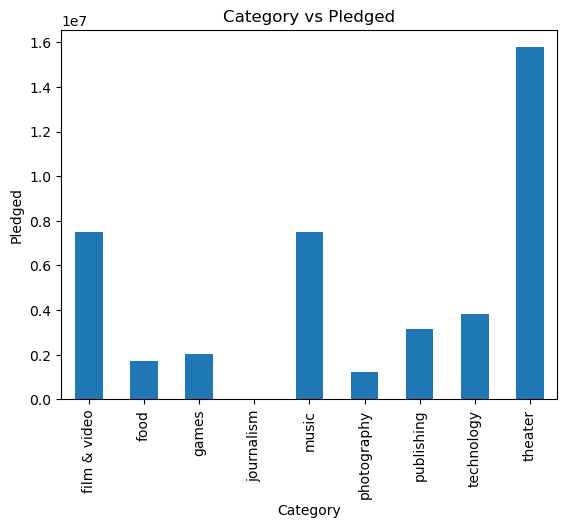

In [18]:
# Create a bar graph that displays the amount pledged for each category 
category_pledged = campaign_df[["category", "pledged"]] 
category_pledged = campaign_df.groupby("category") ["pledged"].sum()
category_pledged.plot.bar(x='category', y='pledged')  
plt.xlabel("Category")
plt.ylabel("Pledged")
plt.title("Category vs Pledged")
plt.show()

In [19]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)

campaign_df['pledged'] = campaign_df['pledged'].astype(float)

#campaign_df['category'] = campaign_df['category'].astype(int)
#campaign_df['subcategory'] = campaign_df['subcategory'].astype(int)

In [20]:
# Check the datatypes
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cf_id                    1000 non-null   int64  
 1   contact_id               1000 non-null   int64  
 2   company_name             1000 non-null   object 
 3   description              1000 non-null   object 
 4   goal                     1000 non-null   float64
 5   pledged                  1000 non-null   float64
 6   outcome                  1000 non-null   object 
 7   backers_count            1000 non-null   int64  
 8   country                  1000 non-null   object 
 9   currency                 1000 non-null   object 
 10  launch_date              1000 non-null   int64  
 11  end_date                 1000 non-null   int64  
 12  staff_pick               1000 non-null   bool   
 13  spotlight                1000 non-null   bool   
 14  category & sub-category  

In [21]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt

campaign_df['launch_date'] = pd.to_datetime(campaign_df['launch_date'])
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'])

campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cf_id                    1000 non-null   int64         
 1   contact_id               1000 non-null   int64         
 2   company_name             1000 non-null   object        
 3   description              1000 non-null   object        
 4   goal                     1000 non-null   float64       
 5   pledged                  1000 non-null   float64       
 6   outcome                  1000 non-null   object        
 7   backers_count            1000 non-null   int64         
 8   country                  1000 non-null   object        
 9   currency                 1000 non-null   object        
 10  launch_date              1000 non-null   datetime64[ns]
 11  end_date                 1000 non-null   datetime64[ns]
 12  staff_pick               1000 non-n

In [22]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
category_df['category'] = category_df['category'].astype(str)
subcategory_df['subcategory'] = subcategory_df['subcategory'].astype(str)

campaign_and_category = pd.merge(campaign_df, category_df, on="category")

campaign_merged_df = pd.merge(campaign_and_category, subcategory_df, on ="subcategory")

campaign_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cf_id                    1000 non-null   int64         
 1   contact_id               1000 non-null   int64         
 2   company_name             1000 non-null   object        
 3   description              1000 non-null   object        
 4   goal                     1000 non-null   float64       
 5   pledged                  1000 non-null   float64       
 6   outcome                  1000 non-null   object        
 7   backers_count            1000 non-null   int64         
 8   country                  1000 non-null   object        
 9   currency                 1000 non-null   object        
 10  launch_date              1000 non-null   datetime64[ns]
 11  end_date                 1000 non-null   datetime64[ns]
 12  staff_pick               1000 non-n

In [23]:
# Drop unwanted columns
campaign_merged_df.drop(columns = ['staff_pick', 'spotlight', 'category & sub-category', 'category', 'subcategory'], inplace=True)
campaign_merged_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,1970-01-01 00:00:01.592629200,1970-01-01 00:00:01.611986400,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,1970-01-01 00:00:01.606629600,1970-01-01 00:00:01.623387600,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process improvement,142400.0,21307.0,failed,296,US,USD,1970-01-01 00:00:01.588654800,1970-01-01 00:00:01.622350800,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,1970-01-01 00:00:01.611900000,1970-01-01 00:00:01.613196000,cat1,subcat1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,1970-01-01 00:00:01.625288400,1970-01-01 00:00:01.625720400,cat8,subcat15
996,1095,3565,Young and Sons,Innovative disintermediate encryption,2400.0,4596.0,successful,144,US,USD,1970-01-01 00:00:01.606543200,1970-01-01 00:00:01.614492000,cat9,subcat24
997,1388,4517,Valenzuela-Cook,Total incremental productivity,6700.0,7496.0,successful,300,US,USD,1970-01-01 00:00:01.609740000,1970-01-01 00:00:01.633323600,cat9,subcat24
998,2448,2389,Little Ltd,Decentralized bandwidth-monitored ability,6900.0,12155.0,successful,419,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.618722000,cat9,subcat24


In [24]:
# Export the DataFrame as a CSV file. 
campaign_merged_df.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [25]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [26]:
contact_info_df.columns

Index(['contact_info'], dtype='object')

### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [27]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json

dict_values = []

for i,row in contact_info_df.iterrows():
    
    data = row['contact_info']
    dict_contacts = json.loads(data)
#     print(dict_contacts)
    dict_columns = [v for k,v in dict_contacts.items()]
    dict_values.append(dict_columns)


# Print out the list of values for each row.
print(dict_values)

[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.girard@web.de'], [1558, 'Stephanie King', 'step

In [28]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contacts_df= pd.DataFrame(dict_values, columns = ['contact_id','name', 'email'])
contacts_df.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [29]:
# Check the datatypes.
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [30]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 

contacts_df[['first_name','last_name']] = contacts_df["name"].str.split(' ', expand=True)

# contacts_df['first_name'] = contacts_df['name'].str.split(' ').str[0]
# contacts_df['last_name'] = contacts_df['name'].str.split(' ').str[0]


# Drop the contact_name column
contacts_df.drop('name', axis=1, inplace=True)
contacts_df.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [31]:
# Reorder the columns
clean_contacts_df = contacts_df[['contact_id', 'first_name', 'last_name', 'email']]
clean_contacts_df.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [32]:
# Check the datatypes one more time before exporting as CSV file.
clean_contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [33]:
# Export the DataFrame as a CSV file. 
clean_contacts_df.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [34]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [35]:
# Extract the four-digit contact ID number.


In [36]:
# Check the datatypes.


In [37]:
# Convert the "contact_id" column to an int64 data type.


In [38]:
# Extract the name of the contact and add it to a new column.


In [39]:
# Extract the email from the contacts and add the values to a new column.


In [40]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.


In [41]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 


# Drop the contact_name column


In [42]:
# Reorder the columns


In [43]:
# Check the datatypes one more time before exporting as CSV file.


In [44]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)